# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

In [3]:
def max_element(arr):
    list = [arr]
    # Your code here

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [10]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6

In [14]:
np.abs(X-v).argmin()

4

In [15]:
X-v

array([[-3.6, -2.6, -1.6, -0.6,  0.4],
       [ 1.4,  2.4,  3.4,  4.4,  5.4]])

In [16]:
X[np.abs(X-v).argmin()]

IndexError: index 4 is out of bounds for axis 0 with size 2

In [ ]:
def nearest_value(X, v):
    X = 

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [ ]:
def scale(X):
    # Your code here

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [22]:
def get_stats(X):
    Determinant = np.linalg.det(X)
    Trace = np.trace(X)
    Max_Element = np.max(X)
    Min_Element = np.min(X)
    Frobenius_norm= np.linalg.norm(X)
    Eigenvalues, Eigenvectors = np.linalg.eig(X)
    print(Determinant, Trace, Max_Element, Min_Element, Frobenius_norm, Eigenvalues, Eigenvectors)

In [23]:
X = np.random.normal(loc=10, scale=1, size=9).reshape((3, 3))

In [24]:
get_stats(X)

-0.889591741489 33.2199491844 11.9325684583 8.4159392401 31.4274804538 [  3.12936042e+01  -1.46457524e-02   1.94099077e+00] [[-0.58291324 -0.7854281  -0.33878143]
 [-0.59773006  0.15997917 -0.48066717]
 [-0.55039162  0.59792087  0.80881779]]


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [ ]:
for exp_num in range(100):
    # Your code here

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [25]:
import pandas as pd
df = pd.read_csv("2008.csv")

In [26]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [27]:
Nan_table = pd.isnull(df)

In [28]:
Nan_table.sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

Как много пропусков! :с

In [29]:
print("Всего их", Nan_table.sum().sum())

Всего их 355215


In [30]:
print(len(Nan_table.T.sum()[Nan_table.T.sum() != 0]), "объектов имеют пропуски.")

70000 объектов имеют пропуски.


In [31]:
print(len(Nan_table.sum()[Nan_table.sum() != 0]), "признаков имеют пропуски.")

16 признаков имеют пропуски.


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [32]:
Nan_table['DepDelay'].sum()

1399

In [33]:
df[Nan_table['DepDelay'] ==1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
194,2008,1,28,1,NaN,1640,NaN,1719,UA,753,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
204,2008,6,13,5,NaN,1229,NaN,1421,OH,5765,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
236,2008,7,19,6,NaN,544,NaN,917,OO,6151,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
257,2008,4,19,6,NaN,1345,NaN,1435,AA,1853,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
267,2008,9,23,2,NaN,1400,NaN,1515,WN,2049,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Можно заметить, что все эти рейсы были отменены (именно поэтому и неизвестна их задержка))0) ). Поэтому можно исключить признаки про отмену: Cancelled и CancellationCode.

In [34]:
X = df[(df['DepDelay']!=0) & (Nan_table['DepDelay']==False)]
y = X['DepDelay']
X.drop(['Cancelled', 'CancellationCode', 'DepDelay'], axis=1, inplace=True)

/Users/tata/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [35]:
y.isnull().sum()

0

In [36]:
X = X.reset_index()
y = y.reset_index()

Все чуки-пуки, пропусков нет!

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [37]:
X['DepTime_Minute'] = np.nan
X['DepTime_Hour'] = np.nan
X['CRSDepTime_Minute'] = np.nan
X['CRSDepTime_Hour'] = np.nan
X['ArrTime_Minute'] = np.nan
X['ArrTime_Hour'] = np.nan
X['CRSArrTime_Minute'] = np.nan
X['CRSArrTime_Hour'] = np.nan

In [38]:
def minutes(X):
    return X.apply(lambda x: int(str(int(x))[-2:]))
def hour(X):
    Z = X.apply(lambda x: str(int(x))[:-2]) 
    for i in Z.index:
        if Z[i] == '':
            Z[i] = 0
        else:
            Z[i] = int(Z[i])
    return Z

In [39]:
X['DepTime_Minute'] = minutes(X['DepTime'])
X['DepTime_Hour'] = hour(X['DepTime'])
X['CRSDepTime_Minute'] = minutes(X['CRSDepTime'])
X['CRSDepTime_Hour'] = hour(X['CRSDepTime'])
X['ArrTime_Minute'] = minutes(X['ArrTime'].dropna()) #NaNы мешают функции работать, выкидываем их
X['ArrTime_Hour'] = hour(X['ArrTime'].dropna())
X['CRSArrTime_Minute'] = minutes(X['CRSArrTime'])
X['CRSArrTime_Hour'] = hour(X['CRSArrTime'])

In [40]:
X.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis=1, inplace=True)

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Все признаки, которые "--Delay" содержат в себе информацию о времени задержки в зависимости от причины. Но это нехорошо - в реальности мы этого знать не будем! (и это-то нам и надо найти). Значит, надо от них избавиться. (Тем более, в них очень много пропусков).

In [41]:
X.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TailNum', 'Year' ], axis=1, inplace=True)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

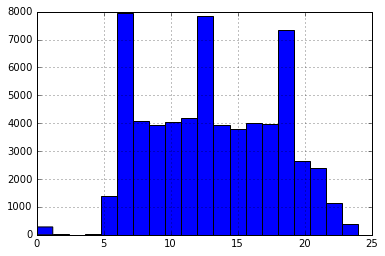

In [46]:
X['DepTime_Hour'].hist(bins=20)

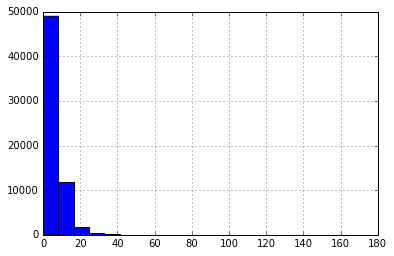

In [47]:
X['TaxiIn'].hist(bins=20)

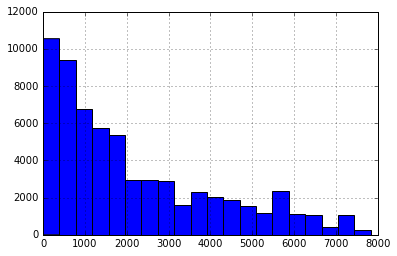

In [48]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Во первых, в данных большой разброс и резкая неоднородность. Во-вторых, часы и минуты изменяются строго в определенном промежутке(от 0 до 24/60), когда FlightNum доходит аж до 8000. Слишком большой разброс и неоднонродные веса получатся! Масштабирование сделает все примерно одинаково распределенным.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [77]:
Types = pd.DataFrame(X.dtypes)
Types

,0
index,int64
Month,int64
DayofMonth,int64
DayOfWeek,int64
UniqueCarrier,category
FlightNum,int64
ActualElapsedTime,float64
CRSElapsedTime,float64
AirTime,float64
ArrDelay,float64


In [69]:
Types[Types == 'object']

,0
index,NaN
Month,NaN
DayofMonth,NaN
DayOfWeek,NaN
UniqueCarrier,object
FlightNum,NaN
ActualElapsedTime,NaN
CRSElapsedTime,NaN
AirTime,NaN
ArrDelay,NaN


In [75]:
X['UniqueCarrier'] = X['UniqueCarrier'].astype('category')
X['Origin'] = X['Origin'].astype('category')
X['Dest'] = X['Dest'].astype('category')
X['DepTime_Hour'] = X['DepTime_Hour'].astype('float64')
X['ArrTime_Hour'] = X['ArrTime_Hour'].astype('float64')
X['CRSDepTime_Hour'] = X['CRSDepTime_Hour'].astype('float64')
X['CRSArrTime_Hour'] = X['CRSArrTime_Hour'].astype('float64')

In [76]:
from sklearn.preprocessing import StandardScaler

In [87]:
def transform_data(X):
    for i in X.columns:
        if X[i].dtype.name == 'int64' or X[i].dtype.name == 'float64':
            X[i] = X[i].fillna(0)
            X[i] = StandardScaler().fit_transform(X[i]) #вещественные признаки масштабируем
        if X[i].dtype.name == 'category':
            X[i] = X[i].fillna(np.nan)
            X = pd.concat([X, pd.get_dummies(X[i])], axis=1)
            X  = X.drop(i, axis=1) #для категориальных делаем one-hot кодирование
    return X

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [88]:
transform_data(X)

/Users/tata/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/tata/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/tata/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your dat

/Users/tata/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/tata/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/tata/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your dat

,index,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
0,-1.735215,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.021975,-0.744130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.735165,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,-0.175419,0.183961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.735115,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.712473,0.471018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.735066,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.533455,-0.347886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.735016,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.661325,0.634799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.734967,-1.583137,-1.445517,0.038288,-0.687530,0.624762,0.499285,0.727403,0.566228,0.525612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-1.734917,-0.997195,1.731554,-1.464878,-0.299738,-0.748333,-0.773785,-0.716686,-0.277715,-0.707147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-1.734868,-0.704223,0.710352,-0.963823,-0.798988,3.045375,3.460244,2.923008,-1.096083,2.674134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-1.734818,-0.997195,-1.332050,-0.963823,-0.882710,0.667229,0.728151,0.889495,-0.482307,0.603099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-1.734769,1.053604,-1.105117,-1.464878,-0.977219,1.021120,1.157276,1.081058,-0.559029,1.457225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


На самом деле, я сегодня ходила на очень крутую выставку и ничего не успела сделать. Проверять работу дальше смысла нет. Хорошего утра/дня/вечера!

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [ ]:
# Your code here

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [ ]:
# Your code here